** <font size = '5'> Task 1: Web scraping and analysis </font> **


# Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  ✅ Trip Verified |  Flew ATL to LHR 8th Jan 202...
1  Not Verified |  Great thing about British Airw...
2  Not Verified | The staff are friendly. The pla...
3  ✅ Trip Verified | Probably the worst business ...
4  ✅ Trip Verified | Definitely not recommended, ...

In [4]:
df.to_csv("BA_reviews.csv")


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!


# Meeting data

In [5]:
import numpy as np
import pandas as pd
import re

In [6]:
df = pd.read_csv('./BA_reviews.csv', index_col = 0)

In [7]:
df.head()

reviews
0  ✅ Trip Verified |  Flew ATL to LHR 8th Jan 202...
1  Not Verified |  Great thing about British Airw...
2  Not Verified | The staff are friendly. The pla...
3  ✅ Trip Verified | Probably the worst business ...
4  ✅ Trip Verified | Definitely not recommended, ...

In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
df.isnull().sum()

reviews    0
dtype: int64

In [10]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [reviews]
Index: []

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [12]:
df.iloc[100]

reviews    Not Verified |  British Airways is poorly staf...
Name: 100, dtype: object

# Data preprocessing

## Cleaning

In [13]:
text=df.iloc[0] 
text

reviews    ✅ Trip Verified |  Flew ATL to LHR 8th Jan 202...
Name: 0, dtype: object

In [14]:
text = str(text)

In [15]:
text = text.split('|')
new = text[1]


In [16]:
new = new.lstrip()
new

'Flew ATL to LHR 8th Jan 202...\nName: 0, dtype: object'

In [17]:
def remove_unne (text): #remove unnecessary part of reviews
    text = text.split('|')
    text = text[1]
    text = text.lstrip()
    return text

In [18]:
df['reviews'] = df['reviews'].apply(lambda x: remove_unne(x))


In [19]:
df

reviews
0    Flew ATL to LHR 8th Jan 2023. Was unlucky enou...
1    Great thing about British Airways A380 is the ...
2    The staff are friendly. The plane was cold, we...
3    Probably the worst business class experience I...
4    Definitely not recommended, especially for bus...
..                                                 ...
995  Naples to Gatwick. The online check-in would n...
996  I have been flying with BA for the last 32 yea...
997  I traveled on British Airways with my wife fro...
998  Flew British Airways from Budapest to London H...
999  The air conditioning didn’t work in the part o...

[1000 rows x 1 columns]

In [20]:
def clean_text (text):
    text = text.lower() 
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text) #remove new line\n
    text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
    return text
    

In [21]:
df['clean'] = df['reviews'].apply(lambda x: clean_text(x))

In [22]:
df

reviews  \
0    Flew ATL to LHR 8th Jan 2023. Was unlucky enou...   
1    Great thing about British Airways A380 is the ...   
2    The staff are friendly. The plane was cold, we...   
3    Probably the worst business class experience I...   
4    Definitely not recommended, especially for bus...   
..                                                 ...   
995  Naples to Gatwick. The online check-in would n...   
996  I have been flying with BA for the last 32 yea...   
997  I traveled on British Airways with my wife fro...   
998  Flew British Airways from Budapest to London H...   
999  The air conditioning didn’t work in the part o...   

                                                 clean  
0    flew atl to lhr  jan  was unlucky enough to be...  
1    great thing about british airways  is the econ...  
2    the staff are friendly the plane was cold we w...  
3    probably the worst business class experience i...  
4    definitely not recommended especially for busi...  
..                                                 ...  
995  naples to gatwick the online checkin would not...  
996  i have been flying with ba for the last  years...  
997  i traveled on british airways with my wife fro...  
998  flew british airways from budapest to london h...  
999  the air conditioning didn’t work in the part o...  

[1000 rows x 2 columns]

## Tokenization

In [23]:
def text_preprocessing (text, language):
    
    #1. Tokenize the cleaned text
    tokens = word_tokenize(text)
    #2. Remove punctuations
    stripped = [w  for w in tokens if w.isalpha()]
    #3. Remove stop words
    stop_words = set(stopwords.words(language))
    words = [w for w in stripped if w not in stop_words]
     #4. Join the information
    combined_text = ' '.join(words)
    return combined_text

In [24]:
df['combined_text'] = df['clean'].apply(lambda x: text_preprocessing(x, 'english'))

In [25]:
df.head()

reviews  \
0  Flew ATL to LHR 8th Jan 2023. Was unlucky enou...   
1  Great thing about British Airways A380 is the ...   
2  The staff are friendly. The plane was cold, we...   
3  Probably the worst business class experience I...   
4  Definitely not recommended, especially for bus...   

                                               clean  \
0  flew atl to lhr  jan  was unlucky enough to be...   
1  great thing about british airways  is the econ...   
2  the staff are friendly the plane was cold we w...   
3  probably the worst business class experience i...   
4  definitely not recommended especially for busi...   

                                       combined_text  
0  flew atl lhr jan unlucky enough board year old...  
1  great thing british airways economy section up...  
2  staff friendly plane cold shivering gave light...  
3  probably worst business class experience ive e...  
4  definitely recommended especially business cla...

In [26]:
print('Raw text:\n', df['reviews'].head())
print('------------')
print('Cleaned text: \n', df['clean'].head())
print('------------')
print('Processed text: \n', df['combined_text'].head())

Raw text:
 0    Flew ATL to LHR 8th Jan 2023. Was unlucky enou...
1    Great thing about British Airways A380 is the ...
2    The staff are friendly. The plane was cold, we...
3    Probably the worst business class experience I...
4    Definitely not recommended, especially for bus...
Name: reviews, dtype: object
------------
Cleaned text: 
 0    flew atl to lhr  jan  was unlucky enough to be...
1    great thing about british airways  is the econ...
2    the staff are friendly the plane was cold we w...
3    probably the worst business class experience i...
4    definitely not recommended especially for busi...
Name: clean, dtype: object
------------
Processed text: 
 0    flew atl lhr jan unlucky enough board year old...
1    great thing british airways economy section up...
2    staff friendly plane cold shivering gave light...
3    probably worst business class experience ive e...
4    definitely recommended especially business cla...
Name: combined_text, dtype: object


## Word Cloud

In [27]:
from wordcloud import WordCloud

In [28]:
text=''.join(df['combined_text'])

In [29]:
wc1 =WordCloud(background_color='white',
              width=600,
              height=400)
wc1.generate(text)

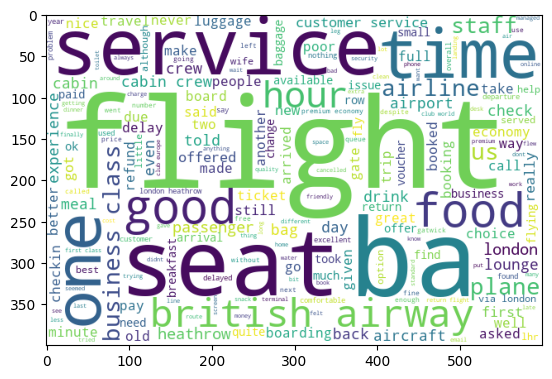

In [30]:
plt.imshow(wc1)

In [31]:
df['combined_text'].str.contains('ba','bristish airway').count()

1000

In [32]:
import plotly.express as px


In [33]:
all_word_clean = df['combined_text'].str.split(expand=True).unstack().value_counts()

In [34]:
all_word_clean[:20]

flight      1762
ba          1136
service      728
london       680
seat         555
food         524
crew         499
time         477
good         455
class        437
seats        435
cabin        432
one          423
staff        399
business     390
british      385
would        383
airways      377
get          339
us           335
dtype: int64

In [35]:
px.bar(df, x = all_word_clean.index[:20], y = all_word_clean.values[:20],
      color = all_word_clean.values[:20],
      title = 'Top 20 word frequencies in the dataset',
      labels = dict(x = 'Word', y = 'Frequency'))

Flight, service, seat, food and crew are some important topics repeatly the most among the reviews.


# Topic modelling

In [36]:
from sklearn.decomposition import LatentDirichletAllocation

In [37]:
import gensim
from gensim import corpora

In [38]:
df['token'] = df['combined_text'].apply(lambda x: nltk.word_tokenize(x))

In [39]:
df['token']

0      [flew, atl, lhr, jan, unlucky, enough, board, ...
1      [great, thing, british, airways, economy, sect...
2      [staff, friendly, plane, cold, shivering, gave...
3      [probably, worst, business, class, experience,...
4      [definitely, recommended, especially, business...
                             ...                        
995    [naples, gatwick, online, checkin, would, work...
996    [flying, ba, last, years, sao, paulo, london, ...
997    [traveled, british, airways, wife, dallas, lag...
998    [flew, british, airways, budapest, london, hea...
999    [air, conditioning, work, part, airplane, sitt...
Name: token, Length: 1000, dtype: object

##  Build the dictionary 

In [40]:

dictionary = corpora.Dictionary(df['token'])
dictionary.save('BA_reviews.dict')
dictionary

In [41]:
#alphabetical order for each sentence 
dictionary.token2id

{'adults': 0,
 'aircraft': 1,
 'although': 2,
 'apart': 3,
 'arm': 4,
 'atl': 5,
 'average': 6,
 'ba': 7,
 'bagel': 8,
 'board': 9,
 'bus': 10,
 'cabin': 11,
 'carrots': 12,
 'cheap': 13,
 'cheese': 14,
 'chicken': 15,
 'coffee': 16,
 'combine': 17,
 'couple': 18,
 'crackers': 19,
 'crammed': 20,
 'creamer': 21,
 'crew': 22,
 'cubes': 23,
 'decent': 24,
 'disappointing': 25,
 'dog': 26,
 'dressing': 27,
 'dried': 28,
 'drinkssnacks': 29,
 'earbuds': 30,
 'egg': 31,
 'else': 32,
 'enduring': 33,
 'enough': 34,
 'especially': 35,
 'everything': 36,
 'falling': 37,
 'finish': 38,
 'flew': 39,
 'flight': 40,
 'food': 41,
 'gave': 42,
 'general': 43,
 'given': 44,
 'great': 45,
 'green': 46,
 'grunt': 47,
 'hanging': 48,
 'hard': 49,
 'headrest': 50,
 'hot': 51,
 'hours': 52,
 'ife': 53,
 'inch': 54,
 'jan': 55,
 'keep': 56,
 'kids': 57,
 'landing': 58,
 'leaf': 59,
 'leg': 60,
 'lhr': 61,
 'life': 62,
 'little': 63,
 'looked': 64,
 'mashed': 65,
 'meal': 66,
 'member': 67,
 'mix': 68,
 'mo

## Create the corpus
Each document will be transformed into a bag of word (BOW) with the frequencies of occurrence.
After applying this techniques, each document is represented as a list of tuples (first element is the numerical identifier of the word, second is the frequence that word appear in the document)

In [42]:
df['token']

0      [flew, atl, lhr, jan, unlucky, enough, board, ...
1      [great, thing, british, airways, economy, sect...
2      [staff, friendly, plane, cold, shivering, gave...
3      [probably, worst, business, class, experience,...
4      [definitely, recommended, especially, business...
                             ...                        
995    [naples, gatwick, online, checkin, would, work...
996    [flying, ba, last, years, sao, paulo, london, ...
997    [traveled, british, airways, wife, dallas, lag...
998    [flew, british, airways, budapest, london, hea...
999    [air, conditioning, work, part, airplane, sitt...
Name: token, Length: 1000, dtype: object

In [43]:
dictionary.doc2bow(['probably', 'worst', 'business', 'class'])

[(252, 1), (257, 1), (344, 1), (398, 1)]

In [44]:
for item in df['token']:
    print (dictionary.doc2bow(item))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 2), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 3), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 2), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 4), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

In [45]:
#Converting list of document (corpus) into Document Term Matrix using Dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['token']]

In [46]:
type(doc_term_matrix)

list

In [47]:
doc_term_matrix[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 2),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 3),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 1),
 (36, 1),
 (37, 2),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 2),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 2),
 (53, 2),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 3),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 3),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 2),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 3),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 2),
 (93, 2),
 (94, 1),
 (95, 1),
 (96, 2),
 (97, 1),
 (98, 1),
 (99, 4),
 (100, 1),

In [48]:
for word_id, count in doc_term_matrix[0]:
    print(word_id, dictionary[word_id])
    print('------------')

0 adults
------------
1 aircraft
------------
2 although
------------
3 apart
------------
4 arm
------------
5 atl
------------
6 average
------------
7 ba
------------
8 bagel
------------
9 board
------------
10 bus
------------
11 cabin
------------
12 carrots
------------
13 cheap
------------
14 cheese
------------
15 chicken
------------
16 coffee
------------
17 combine
------------
18 couple
------------
19 crackers
------------
20 crammed
------------
21 creamer
------------
22 crew
------------
23 cubes
------------
24 decent
------------
25 disappointing
------------
26 dog
------------
27 dressing
------------
28 dried
------------
29 drinkssnacks
------------
30 earbuds
------------
31 egg
------------
32 else
------------
33 enduring
------------
34 enough
------------
35 especially
------------
36 everything
------------
37 falling
------------
38 finish
------------
39 flew
------------
40 flight
------------
41 food
------------
42 gave
------------
43 general
-------

In [49]:
#create and save the gensim Corpus from the processed dictionary
corpora.MmCorpus.serialize('corpus_s.mm', doc_term_matrix)

print(len(doc_term_matrix))

1000


## Running LDA Model
Create an object for LDA Model and train it on Document-Term matrix

In [50]:
#Creating the object for LDA model using gensim library
lda = gensim.models.ldamodel.LdaModel


In [51]:
# running and training LDA model on the document term matrix
ldamodel = lda(doc_term_matrix, num_topics=5, id2word=dictionary, passes=50)

In [52]:
ldamodel


In [53]:
ldamodel.print_topics()

[(0,
  '0.028*"ba" + 0.013*"flight" + 0.008*"business" + 0.008*"seats" + 0.007*"service" + 0.007*"class" + 0.007*"one" + 0.006*"told" + 0.006*"booked" + 0.006*"us"'),
 (1,
  '0.035*"flight" + 0.014*"london" + 0.011*"ba" + 0.010*"british" + 0.010*"airways" + 0.009*"hours" + 0.009*"heathrow" + 0.009*"service" + 0.007*"time" + 0.006*"airport"'),
 (2,
  '0.023*"flight" + 0.013*"ba" + 0.010*"crew" + 0.010*"service" + 0.010*"seat" + 0.010*"good" + 0.010*"cabin" + 0.010*"food" + 0.008*"london" + 0.008*"time"'),
 (3,
  '0.015*"flight" + 0.010*"us" + 0.008*"service" + 0.007*"told" + 0.007*"ba" + 0.007*"customer" + 0.007*"refund" + 0.007*"cancelled" + 0.006*"could" + 0.006*"call"'),
 (4,
  '0.024*"class" + 0.017*"business" + 0.013*"food" + 0.011*"seats" + 0.009*"ba" + 0.009*"first" + 0.008*"seat" + 0.008*"flight" + 0.007*"airways" + 0.007*"service"')]

In [54]:
topics = ldamodel.print_topics(num_words=5, num_topics=20)

In [55]:
topics[4][1]
      

'0.024*"class" + 0.017*"business" + 0.013*"food" + 0.011*"seats" + 0.009*"ba"'

In [56]:
topics[4][0]

4

In [57]:
for i in topics:
    print ('Topic number {}\n'.format((i)[0]))
    for j in i:
        print(j)
        print('------------------------------')

Topic number 0

0
------------------------------
0.028*"ba" + 0.013*"flight" + 0.008*"business" + 0.008*"seats" + 0.007*"service"
------------------------------
Topic number 1

1
------------------------------
0.035*"flight" + 0.014*"london" + 0.011*"ba" + 0.010*"british" + 0.010*"airways"
------------------------------
Topic number 2

2
------------------------------
0.023*"flight" + 0.013*"ba" + 0.010*"crew" + 0.010*"service" + 0.010*"seat"
------------------------------
Topic number 3

3
------------------------------
0.015*"flight" + 0.010*"us" + 0.008*"service" + 0.007*"told" + 0.007*"ba"
------------------------------
Topic number 4

4
------------------------------
0.024*"class" + 0.017*"business" + 0.013*"food" + 0.011*"seats" + 0.009*"ba"
------------------------------


In [59]:
first_topic_words = dict(ldamodel.show_topic(0,1000))

In [60]:
first_topic_words

{'ba': 0.027562521,
 'flight': 0.013482459,
 'business': 0.007746816,
 'seats': 0.0077445954,
 'service': 0.0071158353,
 'class': 0.00709795,
 'one': 0.0070216367,
 'told': 0.0059960387,
 'booked': 0.0056396453,
 'us': 0.005636581,
 'staff': 0.005613022,
 'seat': 0.0055087996,
 'customer': 0.0054302034,
 'london': 0.0053117666,
 'refund': 0.005233579,
 'could': 0.0046183253,
 'airline': 0.004545884,
 'travel': 0.004418279,
 'would': 0.0043038838,
 'flights': 0.0041718185,
 'get': 0.003927433,
 'british': 0.0038544782,
 'airways': 0.0038502794,
 'airport': 0.0038163867,
 'call': 0.0038003277,
 'check': 0.003797858,
 'back': 0.0037149538,
 'airlines': 0.003704052,
 'time': 0.0035493532,
 'luggage': 0.0035124912,
 'change': 0.003491697,
 'fly': 0.0034353,
 'paid': 0.0034054148,
 'said': 0.0033598205,
 'return': 0.0033368915,
 'two': 0.0032835652,
 'number': 0.0032286597,
 'another': 0.0031793318,
 'asked': 0.0031774596,
 'even': 0.0030286592,
 'money': 0.0026861588,
 'wife': 0.0026026831,

## Visualize the results

In [61]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [62]:
#feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

C:\Users\LENOVO\anaconda3\envs\DataAnalytics\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [63]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.100892 -0.049752       1        1  47.270019
1     -0.042509 -0.103070       2        1  20.104121
0     -0.051123  0.017463       3        1  15.072400
4      0.137183  0.074860       4        1   9.348154
3     -0.144443  0.060498       5        1   8.205307, topic_info=         Term         Freq        Total Category  logprob  loglift
257     class   383.000000   383.000000  Default  30.0000  30.0000
252  business   346.000000   346.000000  Default  29.0000  29.0000
7          ba  1038.000000  1038.000000  Default  28.0000  28.0000
41       food   485.000000   485.000000  Default  27.0000  27.0000
40     flight  1627.000000  1627.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
480      back    28.644321   242.694144   Topic5  -5.3661   0.3635
467     still    24.376700   149.819109   Topic5  -5.5274   0.6846
7          ba    44.059719  1038.637935   Topic5  -4.9355  -0.6597
628    london    30.102455   624.755479   Topic5  -5.3164  -0.5324
427     never    23.685160   138.778422   Topic5  -5.5562   0.7324

[426 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3534      2  0.921699       aberdeen
2489      4  0.905245        abreast
5148      2  0.883294            abu
5148      3  0.073608            abu
2524      3  0.238971  accommodation
...     ...       ...            ...
399       4  0.065768          would
399       5  0.102941          would
5736      4  0.810586       yingyang
127       1  0.128678           zero
127       2  0.836406           zero

[858 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 4])

In [64]:
# Word Cloud visualizations of the topics
dict(ldamodel.show_topic(0,1000))

{'ba': 0.027562521,
 'flight': 0.013482459,
 'business': 0.007746816,
 'seats': 0.0077445954,
 'service': 0.0071158353,
 'class': 0.00709795,
 'one': 0.0070216367,
 'told': 0.0059960387,
 'booked': 0.0056396453,
 'us': 0.005636581,
 'staff': 0.005613022,
 'seat': 0.0055087996,
 'customer': 0.0054302034,
 'london': 0.0053117666,
 'refund': 0.005233579,
 'could': 0.0046183253,
 'airline': 0.004545884,
 'travel': 0.004418279,
 'would': 0.0043038838,
 'flights': 0.0041718185,
 'get': 0.003927433,
 'british': 0.0038544782,
 'airways': 0.0038502794,
 'airport': 0.0038163867,
 'call': 0.0038003277,
 'check': 0.003797858,
 'back': 0.0037149538,
 'airlines': 0.003704052,
 'time': 0.0035493532,
 'luggage': 0.0035124912,
 'change': 0.003491697,
 'fly': 0.0034353,
 'paid': 0.0034054148,
 'said': 0.0033598205,
 'return': 0.0033368915,
 'two': 0.0032835652,
 'number': 0.0032286597,
 'another': 0.0031793318,
 'asked': 0.0031774596,
 'even': 0.0030286592,
 'money': 0.0026861588,
 'wife': 0.0026026831,

In [65]:
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
forth_topic_words = dict(ldamodel.show_topic(3,1000))
fifth_topic_words = dict(ldamodel.show_topic(4,1000))

In [66]:
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

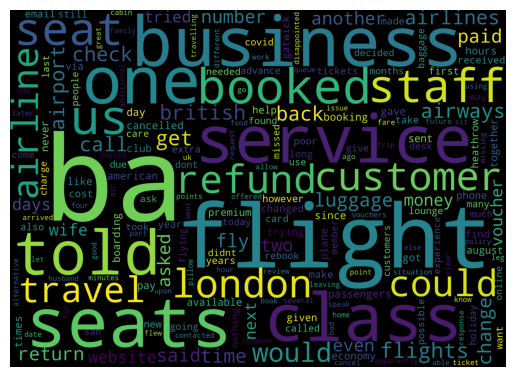

In [67]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(first_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

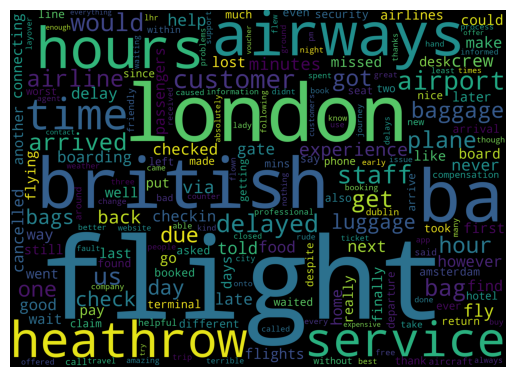

In [68]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(second_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

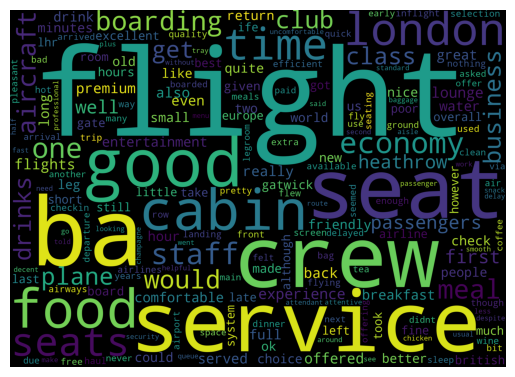

In [69]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(third_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

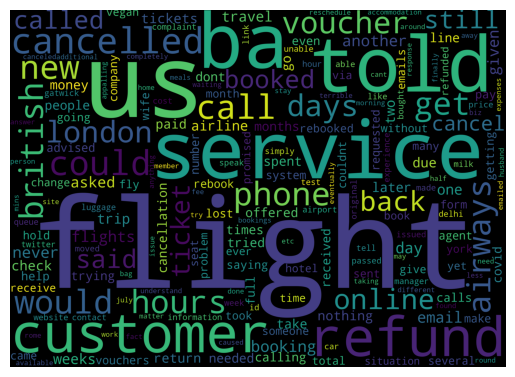

In [70]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(forth_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

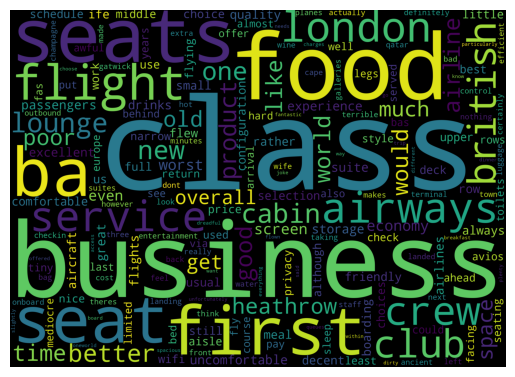

In [71]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(fifth_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Sentiment analysis
Using Vader Sentiment to analysis. Vader belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. Each of the words in the lexicon is rated to whether it is positive or negative.

In [72]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [73]:
analyzer

In [74]:
dir(analyzer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_amplify_ep',
 '_amplify_qm',
 '_but_check',
 '_least_check',
 '_negation_check',
 '_punctuation_emphasis',
 '_sentiment_laden_idioms_check',
 '_sift_sentiment_scores',
 '_special_idioms_check',
 'emoji_full_filepath',
 'emojis',
 'lexicon',
 'lexicon_full_filepath',
 'make_emoji_dict',
 'make_lex_dict',
 'polarity_scores',
 'score_valence',
 'sentiment_valence']

In [75]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']

In [76]:
df.head()

reviews  \
0  Flew ATL to LHR 8th Jan 2023. Was unlucky enou...   
1  Great thing about British Airways A380 is the ...   
2  The staff are friendly. The plane was cold, we...   
3  Probably the worst business class experience I...   
4  Definitely not recommended, especially for bus...   

                                               clean  \
0  flew atl to lhr  jan  was unlucky enough to be...   
1  great thing about british airways  is the econ...   
2  the staff are friendly the plane was cold we w...   
3  probably the worst business class experience i...   
4  definitely not recommended especially for busi...   

                                       combined_text  \
0  flew atl lhr jan unlucky enough board year old...   
1  great thing british airways economy section up...   
2  staff friendly plane cold shivering gave light...   
3  probably worst business class experience ive e...   
4  definitely recommended especially business cla...   

                                               token  
0  [flew, atl, lhr, jan, unlucky, enough, board, ...  
1  [great, thing, british, airways, economy, sect...  
2  [staff, friendly, plane, cold, shivering, gave...  
3  [probably, worst, business, class, experience,...  
4  [definitely, recommended, especially, business...

In [77]:
df.loc[55,'reviews']

'This review is specifically about Maddie, crew member who took care of us. She was attentive, warm, friendly and nothing was too much trouble. Smiling from start to finish. She should be the brand ambassador for BA.'

In [78]:
df.loc[55,'combined_text']

'review specifically maddie crew member took care us attentive warm friendly nothing much trouble smiling start finish brand ambassador ba'

In [79]:
df['score'] = df['reviews'].apply(lambda x: sentiment_analyzer_scores(x))

In [80]:
df['score']

0     -0.9853
1      0.9022
2      0.3118
3     -0.9944
4     -0.7000
        ...  
995   -0.7166
996   -0.9726
997   -0.8872
998    0.9263
999    0.9210
Name: score, Length: 1000, dtype: float64

## Analyse the positive reviews

In [81]:
df[df['score']>=0.5]

reviews  \
1    Great thing about British Airways A380 is the ...   
5    BA shuttle service across the UK is still surp...   
6    I must admit like many others I tend to avoid ...   
7    When will BA update their Business class cabin...   
12   Old A320 with narrow pitch. Flight perfectly o...   
..                                                 ...   
980  First 3 legs were trouble free. Lounges were g...   
983  London to Sao Paulo. Overnight club world flig...   
988  Miami to London. My most recent BA experience ...   
998  Flew British Airways from Budapest to London H...   
999  The air conditioning didn’t work in the part o...   

                                                 clean  \
1    great thing about british airways  is the econ...   
5    ba shuttle service across the uk is still surp...   
6    i must admit like many others i tend to avoid ...   
7    when will ba update their business class cabin...   
12   old  with narrow pitch flight perfectly on tim...   
..                                                 ...   
980  first  legs were trouble free lounges were goo...   
983  london to sao paulo overnight club world fligh...   
988  miami to london my most recent ba experience w...   
998  flew british airways from budapest to london h...   
999  the air conditioning didn’t work in the part o...   

                                         combined_text  \
1    great thing british airways economy section up...   
5    ba shuttle service across uk still surprisingl...   
6    must admit like many others tend avoid ba long...   
7    ba update business class cabin across much tra...   
12   old narrow pitch flight perfectly time constan...   
..                                                 ...   
980  first legs trouble free lounges good staff goo...   
983  london sao paulo overnight club world flight p...   
988  miami london recent ba experience positive fly...   
998  flew british airways budapest london heathrow ...   
999  air conditioning work part airplane sitting ho...   

                                                 token   score  
1    [great, thing, british, airways, economy, sect...  0.9022  
5    [ba, shuttle, service, across, uk, still, surp...  0.8074  
6    [must, admit, like, many, others, tend, avoid,...  0.9574  
7    [ba, update, business, class, cabin, across, m...  0.6165  
12   [old, narrow, pitch, flight, perfectly, time, ...  0.8934  
..                                                 ...     ...  
980  [first, legs, trouble, free, lounges, good, st...  0.7803  
983  [london, sao, paulo, overnight, club, world, f...  0.9474  
988  [miami, london, recent, ba, experience, positi...  0.9659  
998  [flew, british, airways, budapest, london, hea...  0.9263  
999  [air, conditioning, work, part, airplane, sitt...  0.9210  

[448 rows x 5 columns]

It seems that the sentiment analysis doesn't give a nice result. There are some reviews with negative expression which still gain high sentiment scores.

In [82]:
df.loc[996]['reviews']

"I have been flying with BA for the last 32 years between Sao Paulo and London on and off but mostly BA. I have travelled in all classes except First. BA used to be a very good airline and stand out from most but now they look like a low cost airline with high cost fares. Not value for money. The food and drinks are parsimonious to the extend of me having to ask for a drink, even in Business (I flew out Club and returned Economy plus). Staff on board are still the usual arrogant and discretely rude, no changes there. Boarding has become indifferent and they group classes in 5 different queues of travel so we have become just a number. Service is not exclusive anymore. Seats on the 777-300 wear hard and uncomfortable including the beds on CLub. Their lounge performance is very poor also with food option variety (in case of food allergies/intolerances) really bad and of poor quality. It is a shame Singapore Airlines doesn't fly to Brazil from the UK as they definitely offer top quality s

## Analysis the negative reviews

In [83]:
negative = df.loc[df['score'] <= 0, 'reviews']

In [84]:
df['reviews'][991]

'Decided to go in Club Europe for this relatively short flight (90 minutes) from London to Copenhagen. Dropped my bags and went through security, which did not take too long. I then went to the Galleries Lounge (south), and although I have not been there for a year or two, it looked the same. Same food, same drinks, same slow wifi. My gate was just around the corner, and I got on the plane. I like the fresh look inside, but the seat pitch is ridiculous in business. The food service was disappointing. The service in the cabin was OK, but not very warm. I have travelled a lot with BA over the past 20 years, after yesterda I have lost my faith in British Airways.'

In [85]:
negative.values[0]

'Flew ATL to LHR 8th Jan 2023. Was unlucky enough to be on board a 23 year old 777. Refit gave it a decent IFE screen and the seat looked decent. Although combine the IFE with the cheap and nasty earbuds, and any movie can be ruined. Headrest was great, just a pity little padding is used on the seat as my Wife and I were very uncomfortable. The leg room in general is poor, especially when passengers keep their seat reclined from start to finish. Zero room. Aircraft was tired. Rubber spacers falling out, silicone sealer falling apart in the toilets. Toilet seats old, stained. Rubber on arm rest was hanging off. No post take off drinks/snacks offered.  Meal was sent out after a couple of hours. Was poor. Chicken cubes that reminded me of dog food, mashed potatoes that were purified within an inch of their life. Stale rock hard roll, salad which was rice and carrots?! Dried crackers with no cheese. Kids meal was just as sad. Tiny leaf salad with enough dressing to refloat a shipwreck. Cof

In [86]:
#Define sentiment score as 'positive','negative','neutral'
def sentiment (score):
    emotion = ''
    if score >= 0.5:
        emotion = 'Positive'
    elif score < 0:
        emotion = 'Negative'
    else:
        emotion = 'Neutral'
    return emotion

In [87]:
df['sentiment'] = df['score'].apply(sentiment)

In [88]:
df

reviews  \
0    Flew ATL to LHR 8th Jan 2023. Was unlucky enou...   
1    Great thing about British Airways A380 is the ...   
2    The staff are friendly. The plane was cold, we...   
3    Probably the worst business class experience I...   
4    Definitely not recommended, especially for bus...   
..                                                 ...   
995  Naples to Gatwick. The online check-in would n...   
996  I have been flying with BA for the last 32 yea...   
997  I traveled on British Airways with my wife fro...   
998  Flew British Airways from Budapest to London H...   
999  The air conditioning didn’t work in the part o...   

                                                 clean  \
0    flew atl to lhr  jan  was unlucky enough to be...   
1    great thing about british airways  is the econ...   
2    the staff are friendly the plane was cold we w...   
3    probably the worst business class experience i...   
4    definitely not recommended especially for busi...   
..                                                 ...   
995  naples to gatwick the online checkin would not...   
996  i have been flying with ba for the last  years...   
997  i traveled on british airways with my wife fro...   
998  flew british airways from budapest to london h...   
999  the air conditioning didn’t work in the part o...   

                                         combined_text  \
0    flew atl lhr jan unlucky enough board year old...   
1    great thing british airways economy section up...   
2    staff friendly plane cold shivering gave light...   
3    probably worst business class experience ive e...   
4    definitely recommended especially business cla...   
..                                                 ...   
995  naples gatwick online checkin would work accor...   
996  flying ba last years sao paulo london mostly b...   
997  traveled british airways wife dallas lagos nig...   
998  flew british airways budapest london heathrow ...   
999  air conditioning work part airplane sitting ho...   

                                                 token   score sentiment  
0    [flew, atl, lhr, jan, unlucky, enough, board, ... -0.9853  Negative  
1    [great, thing, british, airways, economy, sect...  0.9022  Positive  
2    [staff, friendly, plane, cold, shivering, gave...  0.3118   Neutral  
3    [probably, worst, business, class, experience,... -0.9944  Negative  
4    [definitely, recommended, especially, business... -0.7000  Negative  
..                                                 ...     ...       ...  
995  [naples, gatwick, online, checkin, would, work... -0.7166  Negative  
996  [flying, ba, last, years, sao, paulo, london, ... -0.9726  Negative  
997  [traveled, british, airways, wife, dallas, lag... -0.8872  Negative  
998  [flew, british, airways, budapest, london, hea...  0.9263  Positive  
999  [air, conditioning, work, part, airplane, sitt...  0.9210  Positive  

[1000 rows x 6 columns]

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

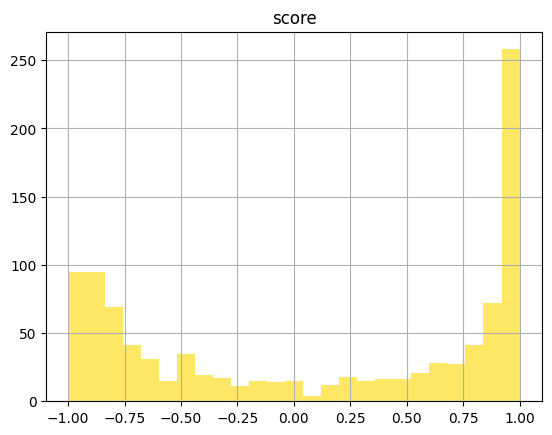

In [89]:
df.hist('score', bins=25,color='gold',alpha=0.6)

In [91]:
sentiment_rate = pd.DataFrame(df['sentiment'].value_counts(normalize=True)*100)

sentiment_rate

sentiment
Negative       46.0
Positive       44.8
Neutral         9.2

<AxesSubplot:>

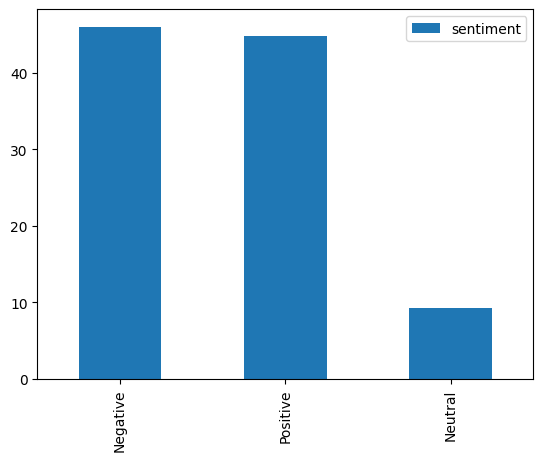

In [92]:
sentiment_rate.plot(kind='bar')

Text(0.5, 1.0, 'Compound')

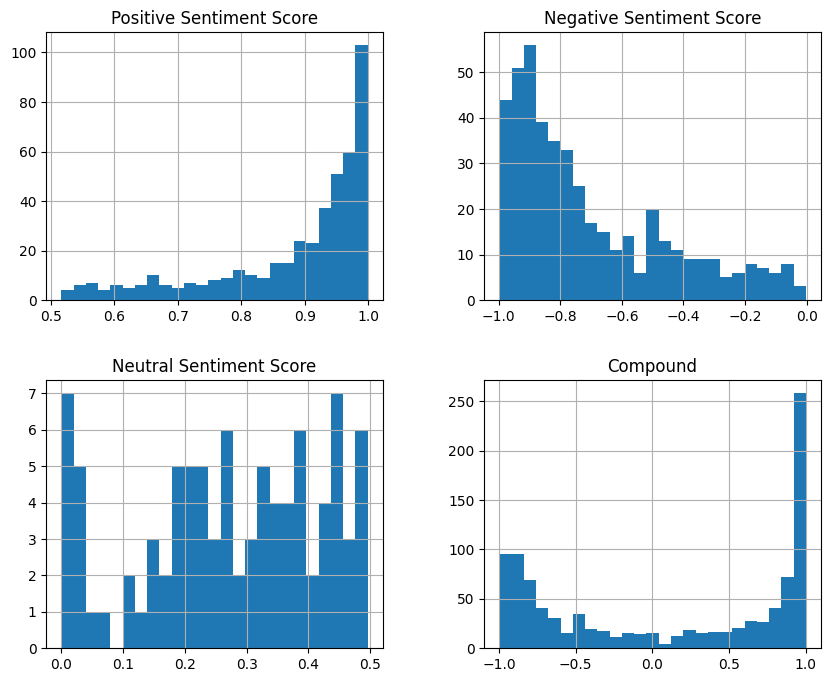

In [93]:
fig, axes = plt.subplots(2,2, figsize=(10,8))

df[df['sentiment']=='Positive'].hist('score', bins=25, ax=axes[0,0])
axes[0,0].set_title('Positive Sentiment Score')

df[df['sentiment']=='Negative'].hist('score', bins=25, ax=axes[0,1])
axes[0,1].set_title('Negative Sentiment Score')

df[df['sentiment']=='Neutral'].hist('score', bins=25, ax=axes[1,0])
axes[1,0].set_title('Neutral Sentiment Score')

df.hist('score', bins=25, ax=axes[1,1])
axes[1,1].set_title('Compound')